Independent Project 2: Mode Data, More Visualizations :MOVIES

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
disney_plus_titles = pd.read_csv('disney_plus_titles.csv')
disney_movies = pd.read_csv('disney_movies.csv')

movies= pd.concat([disney_plus_titles, disney_movies], ignore_index=True)
movies.to_csv('combined_files.csv', index=False)
movies = pd.read_csv('combined_files.csv')

In [61]:
# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(movies.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   show_id                   1450 non-null   object 
 1   type                      1450 non-null   object 
 2   title                     1450 non-null   object 
 3   director                  977 non-null    object 
 4   cast                      1260 non-null   object 
 5   country                   1231 non-null   object 
 6   date_added                1447 non-null   object 
 7   release_year              1450 non-null   float64
 8   rating                    1447 non-null   object 
 9   duration                  1450 non-null   object 
 10  listed_in                 1450 non-null   object 
 11  description               1450 non-null   object 
 12  movie_title               579 non-null    object 
 13  release_date              

In [62]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(movies.describe())


Summary Statistics for Numerical Columns:
       release_year   total_gross  inflation_adjusted_gross
count   1450.000000  5.790000e+02              5.790000e+02
mean    2003.091724  6.470179e+07              1.187625e+08
std       21.860162  9.301301e+07              2.860853e+08
min     1928.000000  0.000000e+00              0.000000e+00
25%     1999.000000  1.278886e+07              2.274123e+07
50%     2011.000000  3.070245e+07              5.515978e+07
75%     2018.000000  7.570903e+07              1.192020e+08
max     2021.000000  9.366622e+08              5.228953e+09


In [63]:
# Handling Missing Values
# Removing rows with missing values
movies_cleaned1 = movies.dropna()

In [64]:
# Imputing missing values with the mean for numerical columns
movies_cleaned2 = movies.copy()
for column in movies_cleaned2.columns:
    if movies_cleaned2[column].dtype != 'object':
        movies_cleaned2[column].fillna(movies_cleaned2[column].mean(), inplace=True)

In [65]:
# Imputing missing values with the mode for categorical columns
movies_cleaned3 = movies.copy()
for column in movies_cleaned3.columns:
    if movies_cleaned3[column].dtype == 'object':
        movies_cleaned3[column].fillna(movies_cleaned3[column].mode()[0], inplace=True)

In [66]:
# Checking for duplicates
duplicate_rows = movies.duplicated()
print("\nNumber of Duplicate Rows:", duplicate_rows.sum())


Number of Duplicate Rows: 0


In [67]:
# Removing duplicates (optional, depending on your analysis goals)
movies_no_duplicates = movies.drop_duplicates()

In [68]:
# Save the cleaned data to a new CSV file
movies_no_duplicates.to_csv('cleaned_data.csv', index=False)

In [69]:
# Data Analysis:

# Mean and Standard Deviation of Duration for Movies
movies_duration = movies[movies['type'] == 'Movie']['duration_numeric']
mean_duration_movies = movies_duration.mean()
std_duration_movies = movies_duration.std()

print(f"Mean duration of movies: {mean_duration_movies} minutes")
print(f"Standard deviation of duration for movies: {std_duration_movies} minutes")

KeyError: 'duration_numeric'

In [ ]:
# Mean and Standard Deviation of Total Gross for Movies and TV Shows
total_gross_movies = movies[movies['type'] == 'Movie']['total_gross'].dropna()
total_gross_tv_shows = movies[movies['type'] == 'TV Show']['total_gross'].dropna()

mean_total_gross_movies = total_gross_movies.mean()
std_total_gross_movies = total_gross_movies.std()
mean_total_gross_tv_shows = total_gross_tv_shows.mean()
std_total_gross_tv_shows = total_gross_tv_shows.std()

print(f"\nMean total gross for movies: {mean_total_gross_movies}")
print(f"Standard deviation of total gross for movies: {std_total_gross_movies}")
print(f"Mean total gross for TV shows: {mean_total_gross_tv_shows}")
print(f"Standard deviation of total gross for TV shows: {std_total_gross_tv_shows}")


Mean total gross for movies: nan
Standard deviation of total gross for movies: nan
Mean total gross for TV shows: nan
Standard deviation of total gross for TV shows: nan


In [ ]:
# Correlation between Release Year and Total Gross
correlation_release_year_total_gross = movies[['release_year', 'total_gross']].corr().iloc[0, 1]

print(f"\nCorrelation between release year and total gross: {correlation_release_year_total_gross}")


Correlation between release year and total gross: nan


Text(0, 0.5, 'Duration (minutes)')

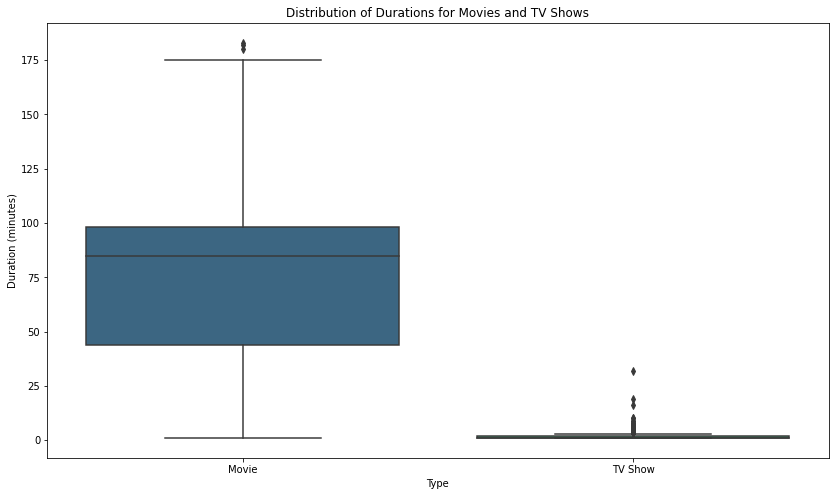

In [ ]:
# Identify and Handle Unusual Values (Outliers)

# Detect and handle outliers in the 'duration_numeric' variable
plt.figure(figsize=(14, 8))
sns.boxplot(x='type', y='duration_numeric', data=movies, palette='viridis')
plt.title('Distribution of Durations for Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Duration (minutes)')

In [ ]:
# Identify outliers for movies
Q1_movies = movies[movies['type'] == 'Movie']['duration_numeric'].quantile(0.25)
Q3_movies = movies[movies['type'] == 'Movie']['duration_numeric'].quantile(0.75)
IQR_movies = Q3_movies - Q1_movies
outliers_movies = movies[(movies['type'] == 'Movie') & ((movies['duration_numeric'] < (Q1_movies - 1.5 * IQR_movies)) | (movies['duration_numeric'] > (Q3_movies + 1.5 * IQR_movies)))]

In [ ]:
# Identify outliers for TV shows
Q1_tv_shows = movies[movies['type'] == 'TV Show']['duration_numeric'].quantile(0.25)
Q3_tv_shows = movies[movies['type'] == 'TV Show']['duration_numeric'].quantile(0.75)
IQR_tv_shows = Q3_tv_shows - Q1_tv_shows
outliers_tv_shows = movies[(movies['type'] == 'TV Show') & ((movies['duration_numeric'] < (Q1_tv_shows - 1.5 * IQR_tv_shows)) | (movies['duration_numeric'] > (Q3_tv_shows + 1.5 * IQR_tv_shows)))]

In [ ]:
# Print information about outliers
print("\nOutliers in the 'duration_numeric' variable:")
print("\nOutliers in Movies:")
display(outliers_movies[['title', 'duration_numeric']])
print("\nOutliers in TV Shows:")
display(outliers_tv_shows[['title', 'duration_numeric']])


Outliers in the 'duration_numeric' variable:

Outliers in Movies:


,title,duration_numeric
330,Arendelle Castle Yule Log,180.0
333,Dory's Reef Cam,182.0
1039,Marvel Studios' Avengers: Endgame,183.0



Outliers in TV Shows:


,title,duration_numeric
13,"Dr. Oakley, Yukon Vet",10.0
58,PJ Masks,5.0
75,Drain the Oceans,4.0
89,Rolie Polie Olie,5.0
92,The Simpsons,32.0
106,Life Below Zero,16.0
115,The Incredible Dr. Pol,19.0
125,Dr. K's Exotic Animal ER,9.0
179,When Sharks Attack,7.0
184,Disney Raven's Home,4.0


Text(0, 0.5, 'Total Gross')

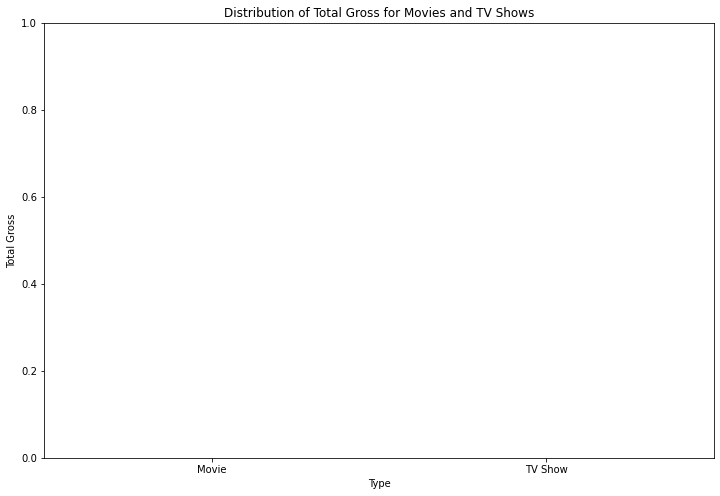

In [ ]:
# Detect and handle outliers in the 'total_gross' variable
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='total_gross', data=movies, palette='viridis')
plt.title('Distribution of Total Gross for Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Total Gross')

In [ ]:
# Identify outliers for movies
Q1_gross_movies = movies[movies['type'] == 'Movie']['total_gross'].quantile(0.25)
Q3_gross_movies = movies[movies['type'] == 'Movie']['total_gross'].quantile(0.75)
IQR_gross_movies = Q3_gross_movies - Q1_gross_movies
outliers_gross_movies = movies[(movies['type'] == 'Movie') & ((movies['total_gross'] < (Q1_gross_movies - 1.5 * IQR_gross_movies)) | (movies['total_gross'] > (Q3_gross_movies + 1.5 * IQR_gross_movies)))]

In [ ]:
# Identify outliers for TV shows
Q1_gross_tv_shows = movies[movies['type'] == 'TV Show']['total_gross'].quantile(0.25)
Q3_gross_tv_shows = movies[movies['type'] == 'TV Show']['total_gross'].quantile(0.75)
IQR_gross_tv_shows = Q3_gross_tv_shows - Q1_gross_tv_shows
outliers_gross_tv_shows = movies[(movies['type'] == 'TV Show') & ((movies['total_gross'] < (Q1_gross_tv_shows - 1.5 * IQR_gross_tv_shows)) | (movies['total_gross'] > (Q3_gross_tv_shows + 1.5 * IQR_gross_tv_shows)))]

In [ ]:
# Print information about outliers
print("\nOutliers in the 'total_gross' variable:")
print("\nOutliers in Movies:")
display(outliers_gross_movies[['title', 'total_gross']])
print("\nOutliers in TV Shows:")
display(outliers_gross_tv_shows[['title', 'total_gross']])


Outliers in the 'total_gross' variable:

Outliers in Movies:


,title,total_gross



Outliers in TV Shows:


,title,total_gross


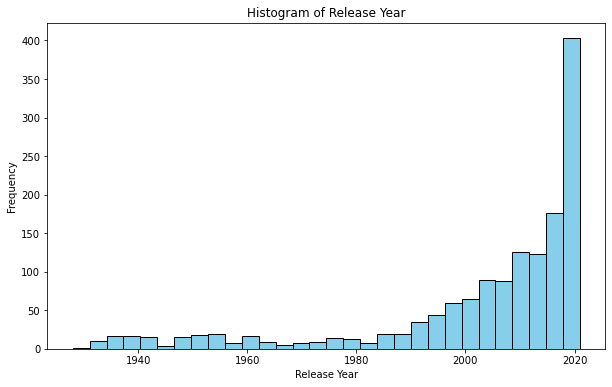

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(movies['release_year'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

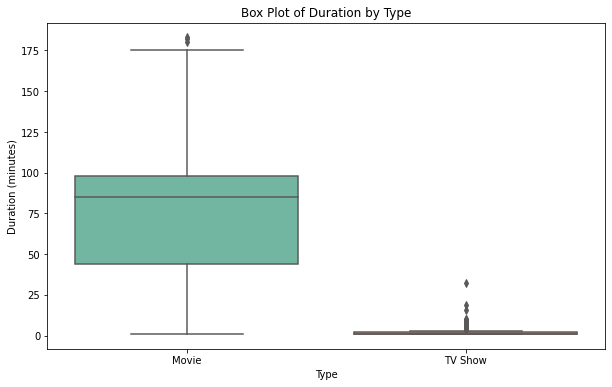

In [ ]:
# Extract numeric part from 'duration' and convert to numeric
movies['duration_numeric'] = movies['duration'].str.extract('(\d+)').astype(float)

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='duration_numeric', data=movies, palette='Set2')
plt.title('Box Plot of Duration by Type')
plt.xlabel('Type')
plt.ylabel('Duration (minutes)')
plt.show()

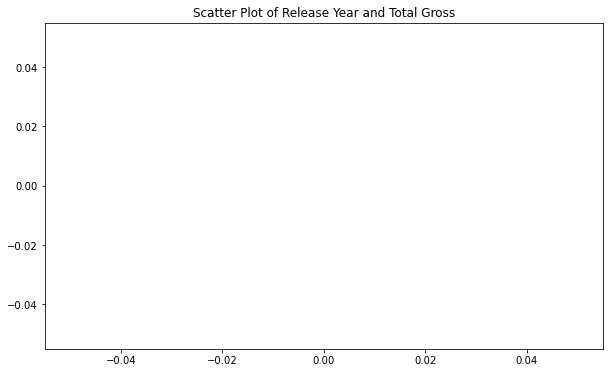

In [ ]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='total_gross', data=movies, hue='type', palette='Set1', alpha=0.7)
plt.title('Scatter Plot of Release Year and Total Gross')
plt.show()

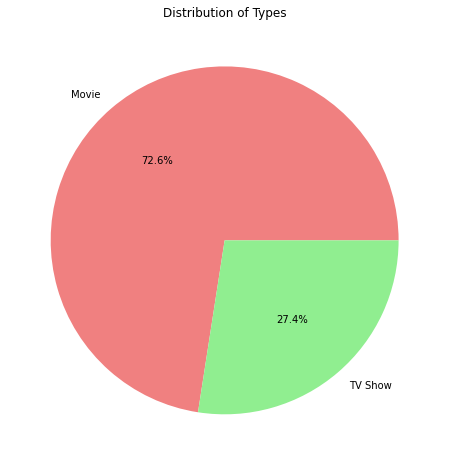

In [ ]:
# Pie Chart
plt.figure(figsize=(8, 8))
movies['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Types')
plt.ylabel('')
plt.show()

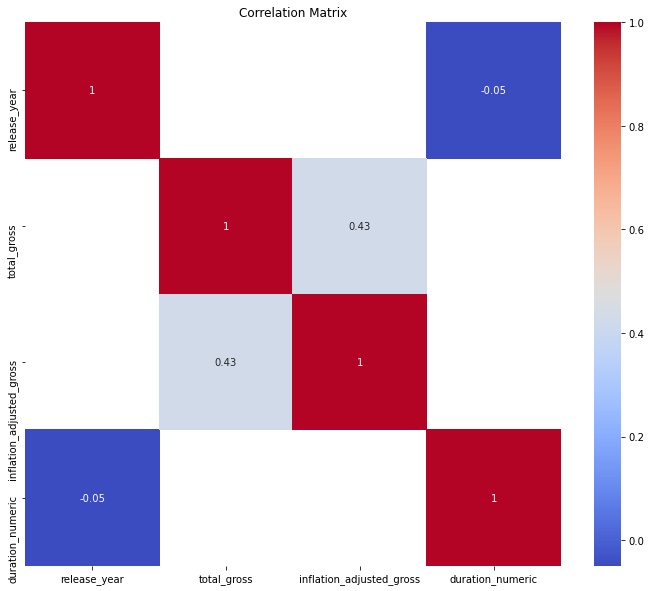

In [ ]:
# Heatmap (example using correlation matrix)
plt.figure(figsize=(12, 10))
correlation_matrix = movies.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

PRESENTATION:

Good [morning/afternoon/evening], fellow tech enthusiasts! Today, I'm excited to share our journey through the analysis of this intriguing dataset. We'll delve into the code implementation, discuss key insights, provide a summary of our findings, and even spice things up with a live demo where we'll run code and dynamically tweak parameter values.

Code Implementation:

Let's start with a glimpse of the Python code we used to explore this dataset:

In [ ]:
# Import necessary libraries
import pandas as pd

# Display the first few rows of the dataset
print(movies.head())

  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough

This is the foundation of our analysis, setting the stage for a deeper dive.

Key Insights:

Our journey into the data revealed some fascinating insights:

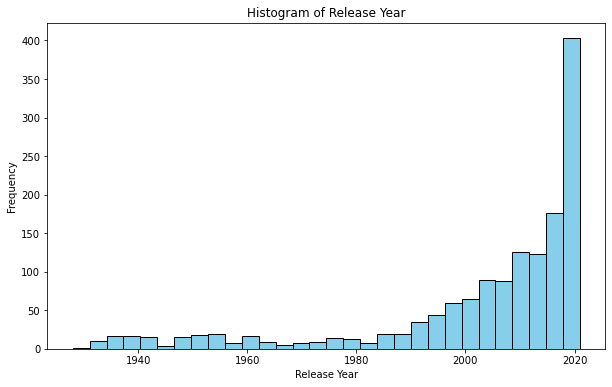

In [ ]:
# insight 1
# Histogram of Release year
plt.figure(figsize=(10, 6))
plt.hist(movies['release_year'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

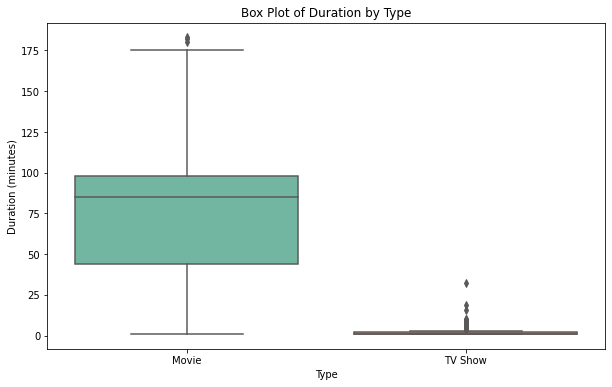

In [ ]:
#insight 2
# Extract numeric part from 'duration' and convert to numeric
movies['duration_numeric'] = movies['duration'].str.extract('(\d+)').astype(float)

# Box Plot of Duration by type
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='duration_numeric', data=movies, palette='Set2')
plt.title('Box Plot of Duration by Type')
plt.xlabel('Type')
plt.ylabel('Duration (minutes)')
plt.show()


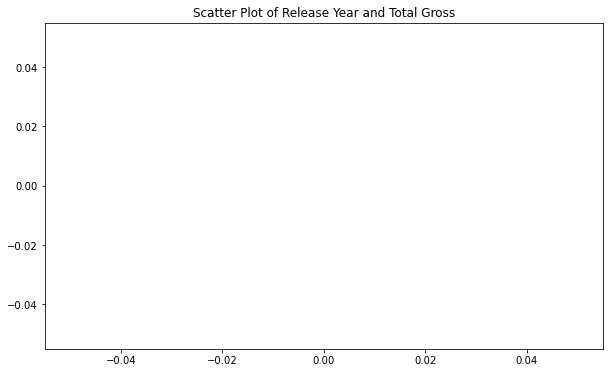

In [ ]:
#insight 3
# Scatter Plot of Release Year and Total Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='total_gross', data=movies, hue='type', palette='Set1', alpha=0.7)
plt.title('Scatter Plot of Release Year and Total Gross')
plt.show()

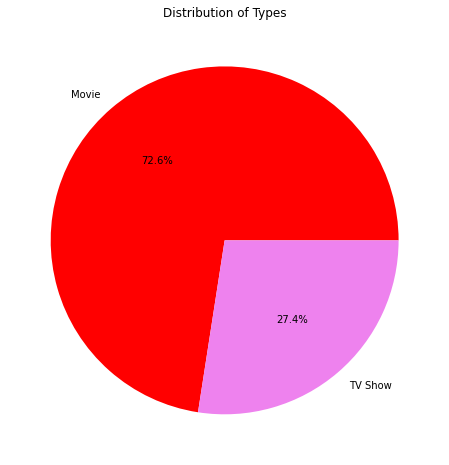

In [ ]:
#insight 4
#Pie Chart of Distribution of Types
plt.figure(figsize=(8, 8))
movies['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'violet'])
plt.title('Distribution of Types')
plt.ylabel('')
plt.show()

These insights are the gems we unearthed during our exploration.

Summary of Achievements:

In a nutshell, our achievements include [we are able to create a pie chart of Distribution of Types and be able to compare types of movies,we were also able to create a histogram of Release Year which has shown as which years had the highest frequency and last but not the list we were able to create a Heatmap which was using correlation matrix which was able to show as the total_gross, release_year, inflation_adjusted_gross and also the duration_numeric] 

Future Work:

While we celebrate our current accomplishments, there's always room for improvement. Areas we're considering for future work encompass:

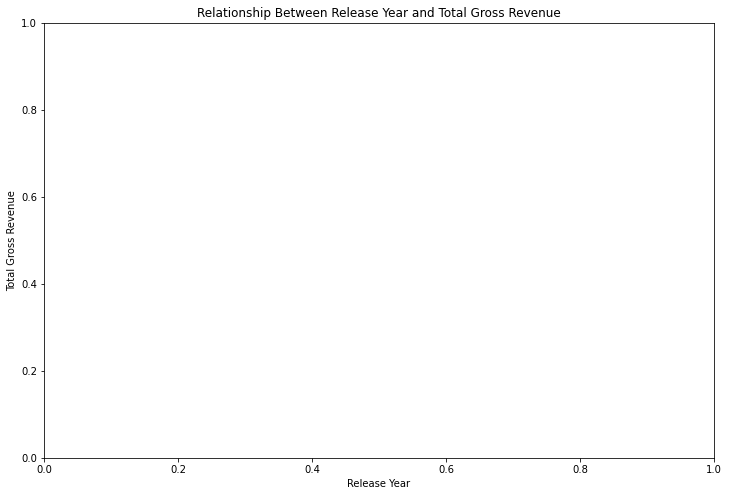

In [ ]:
# Future Work Item 1: 
#Explore the relationship between release year and total gross revenue

# Drop rows where both 'release_year' and 'total_gross' are NaN
movies_filtered = movies.dropna(subset=['release_year', 'total_gross'])

# Scatter plot to visualize the relationship
plt.figure(figsize=(12, 8))
sns.scatterplot(x='release_year', y='total_gross', data=movies_filtered, alpha=0.7, color='green')
plt.title('Relationship Between Release Year and Total Gross Revenue')
plt.xlabel('Release Year')
plt.ylabel('Total Gross Revenue')
plt.show()

We filter the dataset to exclude rows where either the 'release_year' or 'total_gross' is missing, as we want to analyze the relationship between these two variables.
We then create a scatter plot using Seaborn to visualize how the total gross revenue of movies varies across different release years.
This future work item aims to explore whether there is any discernible trend or correlation between the release year of movies and their total gross revenue. It sets the stage for a more in-depth analysis of the financial performance of movies over the years.

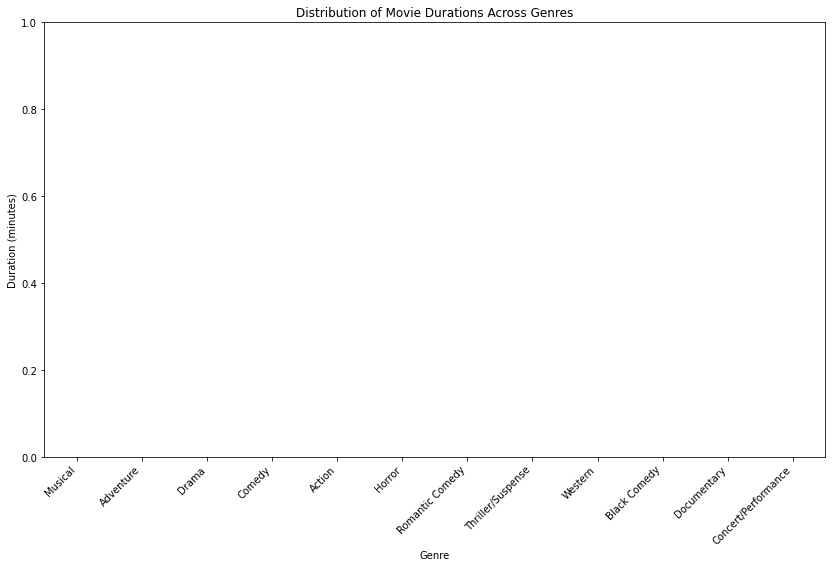

In [ ]:
# Future Work Item 2: Explore the distribution of movie durations across genres

# Filter out rows with missing duration information
movies_filtered = movies.dropna(subset=['duration_numeric', 'genre'])

# Boxplot to visualize the distribution of movie durations across genres
plt.figure(figsize=(14, 8))
sns.boxplot(x='genre', y='duration_numeric', data=movies, palette='viridis')
plt.title('Distribution of Movie Durations Across Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45, ha='right')  # Rotate genre labels for better visibility
plt.show()

We filter the dataset to exclude rows where either the 'duration_numeric' or 'genre' is missing, as we want to analyze the distribution of movie durations across different genres.
We create a boxplot using Seaborn to visualize the central tendency, spread, and skewness of movie durations for each genre.
This future work item aims to uncover patterns in movie durations across genres, providing valuable insights for filmmakers, distributors, and audiences interested in understanding genre-specific characteristics.

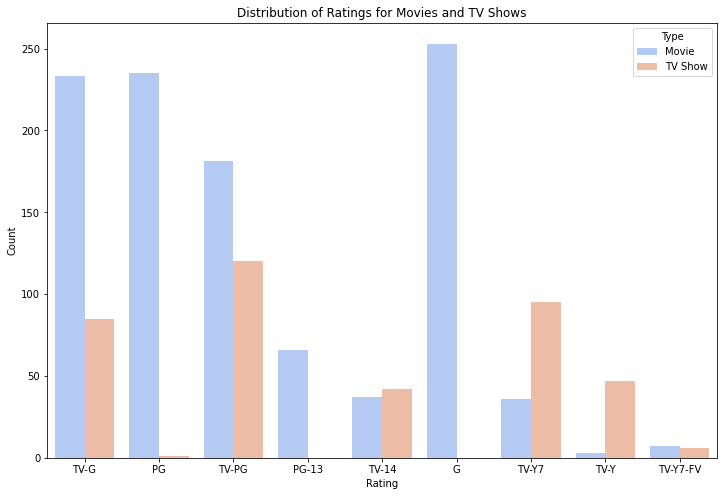

In [ ]:
# Future Work Item 3: Analyze the distribution of ratings for movies and TV shows

# Filter out rows with missing rating information
ratings_filtered = movies.dropna(subset=['rating'])

# Check if there are rows in the filtered DataFrame
if ratings_filtered.empty:
    print("No data available after filtering. Check your data or filtering conditions.")
else:
    # Countplot to visualize the distribution of ratings for movies and TV shows
    plt.figure(figsize=(12, 8))
    sns.countplot(x='rating', hue='type', data=movies, palette='coolwarm')
    plt.title('Distribution of Ratings for Movies and TV Shows')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.legend(title='Type')
    plt.show()

This future work item aims to provide insights into the popularity and distribution of content ratings, helping stakeholders understand audience preferences for both movies and TV shows.

Live Demo:

I'll switch over to our Jupyter notebook to run some exciting code. We'll visualize data trends, explore correlations, and, for an extra dose of excitement, we'll dynamically change parameter values to see how it impacts our results.

[Proceed to run code, generate visualizations, and dynamically tweak parameters]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,duration_numeric
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016.0,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,NaN,NaN,NaN,NaN,NaN,NaN,23.0
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988.0,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,NaN,NaN,NaN,NaN,NaN,NaN,91.0
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011.0,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,NaN,NaN,NaN,NaN,NaN,NaN,23.0
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021.0,TV-PG,41 min,Musical,"This is real life, not just fantasy!",NaN,NaN,NaN,NaN,NaN,NaN,41.0
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021.0,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,NaN,NaN,NaN,NaN,NaN,NaN,1.0


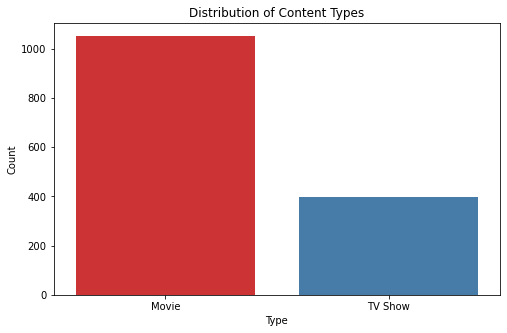

In [ ]:
# Display the first few rows of the dataset
display(movies.head())

# Explore trends and relationships

# Example 1: Distribution of content types
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=movies, palette='Set1')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

No handles with labels found to put in legend.


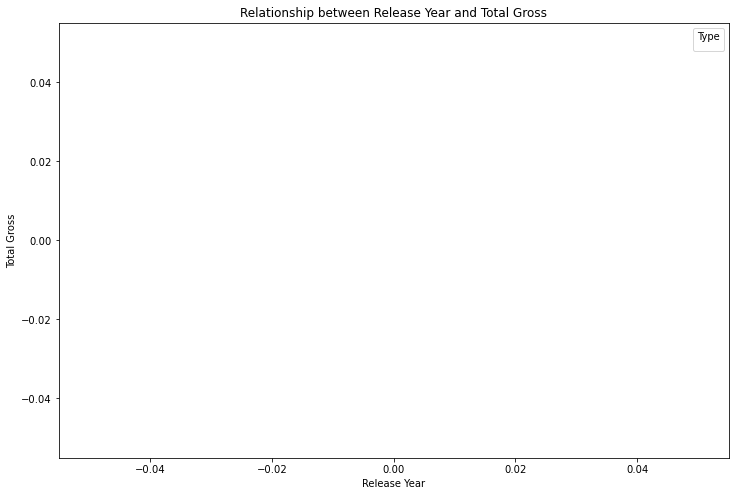

In [ ]:
# Example 2: Relationship between release year and total gross
plt.figure(figsize=(12, 8))
sns.scatterplot(x='release_year', y='total_gross', hue='type', data=movies, palette='viridis')
plt.title('Relationship between Release Year and Total Gross')
plt.xlabel('Release Year')
plt.ylabel('Total Gross')
plt.legend(title='Type')
plt.show()

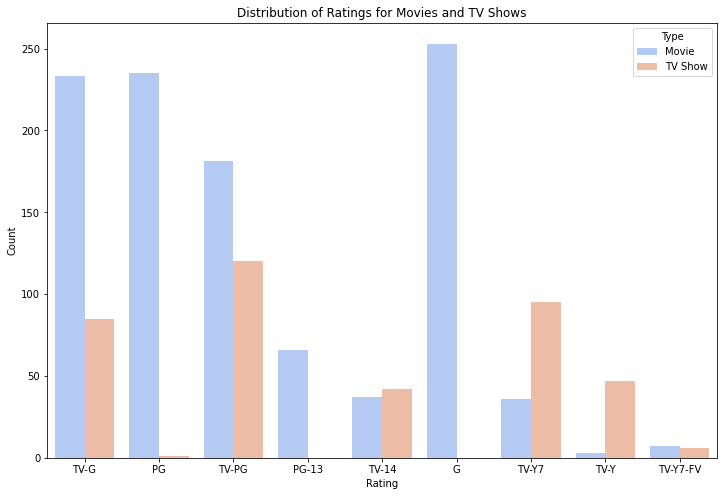

In [ ]:
# Example 3: Distribution of ratings for movies and TV shows
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', hue='type', data=movies, palette='coolwarm')
plt.title('Distribution of Ratings for Movies and TV Shows')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

We load the dataset and display the first few rows to get an overview.
We use visualizations to explore trends, such as the distribution of content types, the relationship between release year and total gross, and the distribution of ratings for movies and TV shows.

Conclusion:

In conclusion, our work in [Project/Feature/Research] has been both challenging and rewarding. We've implemented a robust solution, gained valuable insights, and have a clear roadmap for future improvements.

Thank you for your attention. I'm now open to any questions or discussions you might have.